In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [2]:
path = r'C:\Users\kuohe\ClimateWins\02 Data'

In [3]:
col_names = ['DATE',
             'BASEL_pleasant_weather',
             'BELGRADE_pleasant_weather',
             'BUDAPEST_pleasant_weather',
             'DEBILT_pleasant_weather',
             'DUSSELDORF_pleasant_weather',
             'HEATHROW_pleasant_weather',
             'KASSEL_pleasant_weather',
             'LJUBLJANA_pleasant_weather',
             'MAASTRICHT_pleasant_weather',
             'MADRID_pleasant_weather',
             'MUNCHENB_pleasant_weather',
             'OSLO_pleasant_weather',
             'SONNBLICK_pleasant_weather',
             'STOCKHOLM_pleasant_weather',
             'VALENTIA_pleasant_weather']

df_labels = pd.read_csv(os.path.join(path, 'pleasant weather.csv'), index_col=False)

In [4]:
scaled = pd.read_csv(os.path.join(path, 'Dataset_scaled_correct.csv'))

In [5]:
df_labels

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
scaled['DATE'] = df_labels['DATE']

In [7]:
scaled = scaled.drop(columns=["id", "MONTH"])

In [8]:
scaled["DATE"] = scaled["DATE"].apply(pd.to_datetime)

In [9]:
scaled.dtypes

BASEL_cloud_cover                float64
BASEL_wind_speed                 float64
BASEL_humidity                   float64
BASEL_pressure                   float64
BASEL_global_radiation           float64
                               ...      
VALENTIA_sunshine                float64
VALENTIA_temp_mean               float64
VALENTIA_temp_min                float64
VALENTIA_temp_max                float64
DATE                      datetime64[ns]
Length: 169, dtype: object

In [10]:
label_cols = list(df_labels.columns)
label_cols = [x.split("_")[0] for x in label_cols]
label_cols.remove('DATE')

In [11]:
label_cols

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [12]:
len(scaled.columns)

169

In [13]:
cols_to_keep = []
for col in label_cols:
    for scaled_col in scaled.columns:
        if col in scaled_col:
            cols_to_keep.append(scaled_col)

In [14]:
for col in cols_to_keep:
    print(col)

BASEL_cloud_cover
BASEL_wind_speed
BASEL_humidity
BASEL_pressure
BASEL_global_radiation
BASEL_precipitation
BASEL_snow_depth
BASEL_sunshine
BASEL_temp_mean
BASEL_temp_min
BASEL_temp_max
BELGRADE_cloud_cover
BELGRADE_humidity
BELGRADE_pressure
BELGRADE_global_radiation
BELGRADE_precipitation
BELGRADE_sunshine
BELGRADE_temp_mean
BELGRADE_temp_min
BELGRADE_temp_max
BUDAPEST_cloud_cover
BUDAPEST_humidity
BUDAPEST_pressure
BUDAPEST_global_radiation
BUDAPEST_precipitation
BUDAPEST_sunshine
BUDAPEST_temp_mean
BUDAPEST_temp_min
BUDAPEST_temp_max
DEBILT_cloud_cover
DEBILT_wind_speed
DEBILT_humidity
DEBILT_pressure
DEBILT_global_radiation
DEBILT_precipitation
DEBILT_sunshine
DEBILT_temp_mean
DEBILT_temp_min
DEBILT_temp_max
DUSSELDORF_cloud_cover
DUSSELDORF_wind_speed
DUSSELDORF_humidity
DUSSELDORF_pressure
DUSSELDORF_global_radiation
DUSSELDORF_precipitation
DUSSELDORF_snow_depth
DUSSELDORF_sunshine
DUSSELDORF_temp_mean
DUSSELDORF_temp_min
DUSSELDORF_temp_max
HEATHROW_cloud_cover
HEATHROW_humidi

In [15]:
len(cols_to_keep)

147

In [16]:
df_labels

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
y = df_labels.iloc[:, 1:]
X = scaled[cols_to_keep]

In [18]:
# Assuming X is already defined and structured correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Verify the structure of y_test
print(type(y_test))
print(y_test.shape)


<class 'pandas.core.frame.DataFrame'>
(5738, 15)


In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [20]:
X_test.dtypes

BASEL_cloud_cover         float64
BASEL_wind_speed          float64
BASEL_humidity            float64
BASEL_pressure            float64
BASEL_global_radiation    float64
                           ...   
VALENTIA_snow_depth       float64
VALENTIA_sunshine         float64
VALENTIA_temp_mean        float64
VALENTIA_temp_min         float64
VALENTIA_temp_max         float64
Length: 147, dtype: object

In [21]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

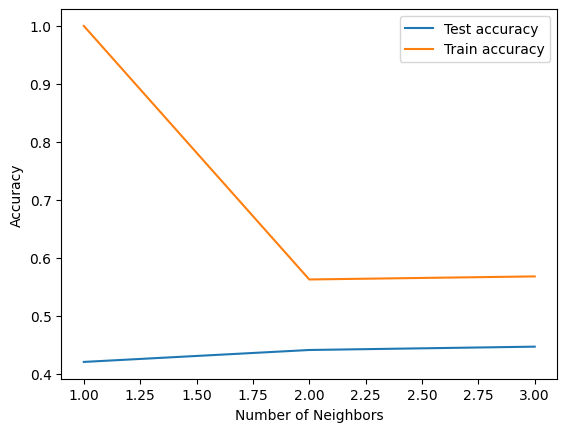

In [22]:
#ploting the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

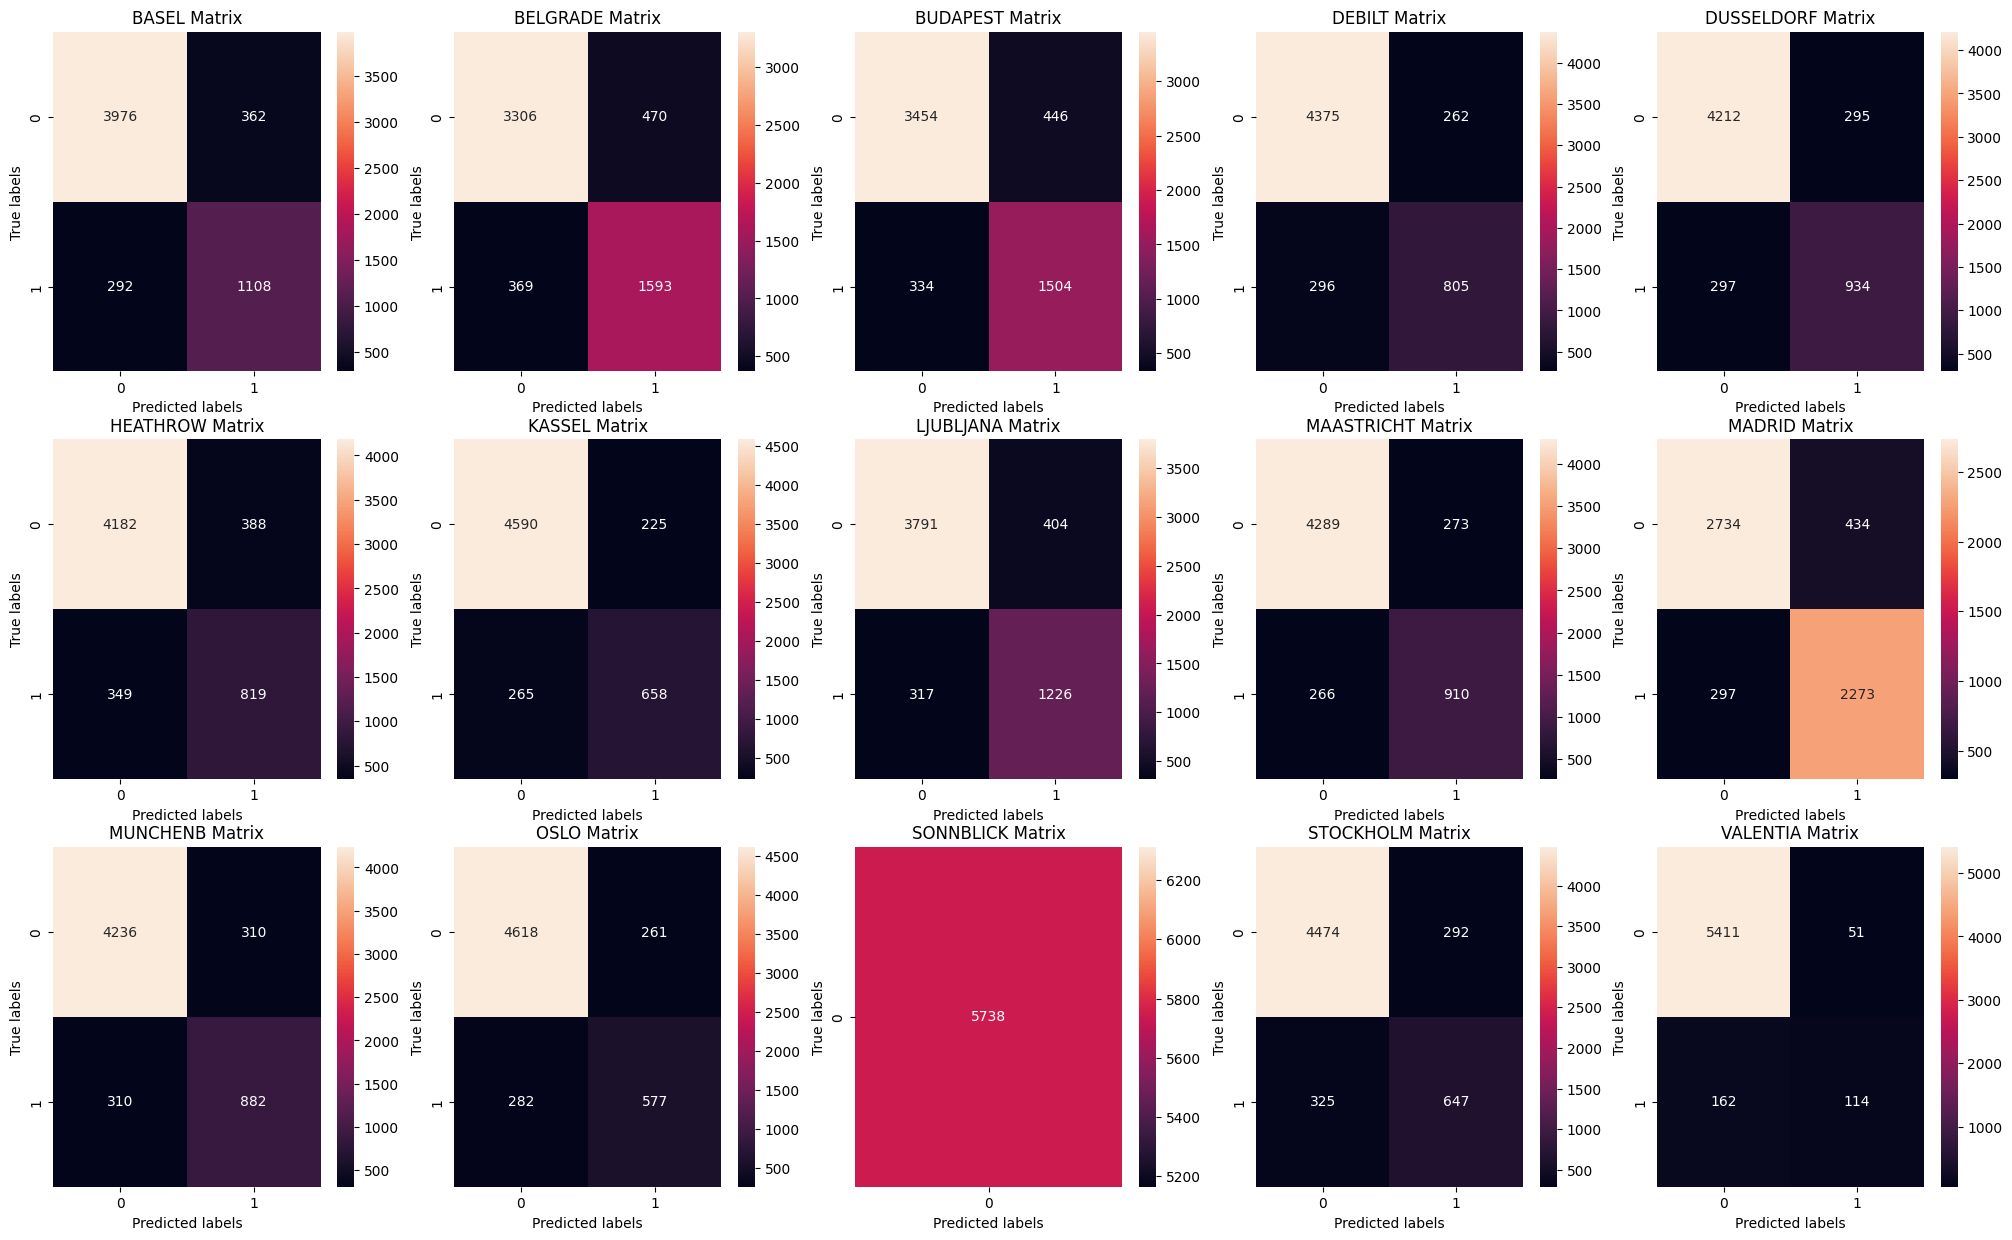

In [28]:
locations = list({x.split("_")[0] for x in df_labels.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1